In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

plt.rcParams["figure.figsize"] = (20, 10)
pd.set_option('display.max_columns', None)
display.max_rows = 10

C:\Users\sithl\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
players = pd.read_csv('project_data\players.csv')
players_salary = pd.read_csv('project_data\players_salary.csv')
teams = pd.read_csv('project_data\\teams.csv')
teams_salary = pd.read_csv('project_data\\teams_salary.csv')
teams_average = pd.read_csv('project_data\\teams_average.csv')
players_average = pd.read_csv('project_data\players_average.csv')

In [3]:
teams_average.drop(index=0, columns='Unnamed: 0', inplace=True)
teams_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                     'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median'}, inplace=True)
teams_average.reset_index(drop=True, inplace=True)
teams_average = teams_average.astype(float)

players_average.drop(index=0, columns='Unnamed: 0', inplace=True)
players_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                       'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median',
                       'aggregated_salary': 'agg_mean', 'aggregated_salary.1': 'agg_std', 'aggregated_salary.2': 'agg_median'}, inplace=True)
players_average.reset_index(drop=True, inplace=True)
players_average = players_average.astype(float)

### Examing growth of MLB team salaries over time

some brief notes:

* data for 1994 is missing due to the MLB player's strike
* most of the outlier datapoints are the New York Yankees

In [16]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (18, 10)

Text(0.5, 1.0, 'MLB Salary Over Time')

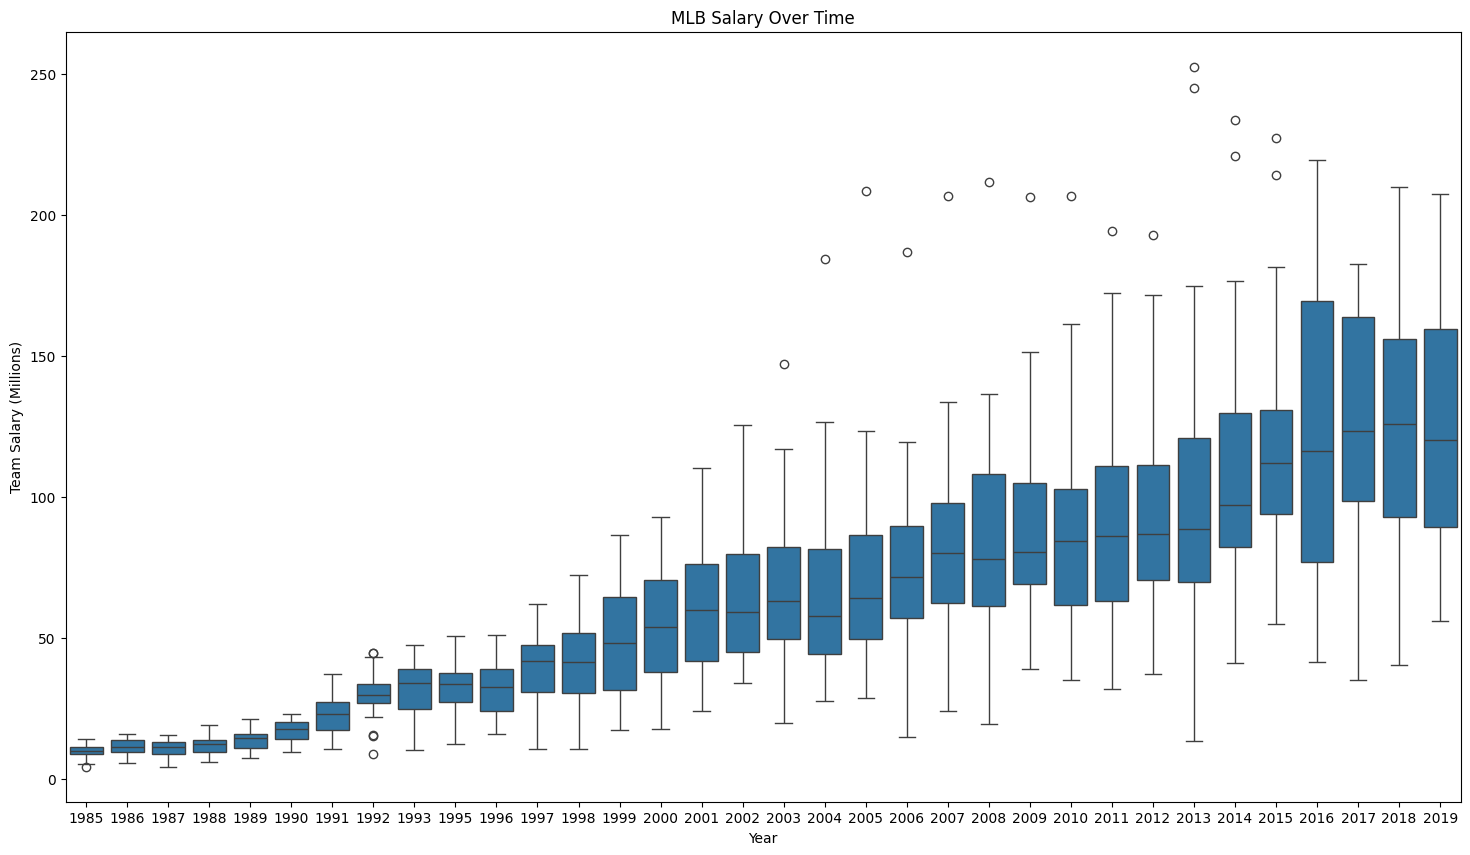

In [17]:
fig, ax = plt.subplots()
sns.boxplot(x = teams['yearID'],y = teams['salary_x']/1000000, ax=ax)
#sns.scatterplot(x = teams['yearID'].unique().astype(str),y = teams[teams['WSWin'] == 'Y']['salary_x']/1000000, s = 70,color='red',ax=ax)
#ax.set_yscale('log')
plt.xlabel('Year')
plt.ylabel('Team Salary (Millions)')
plt.title('MLB Salary Over Time')

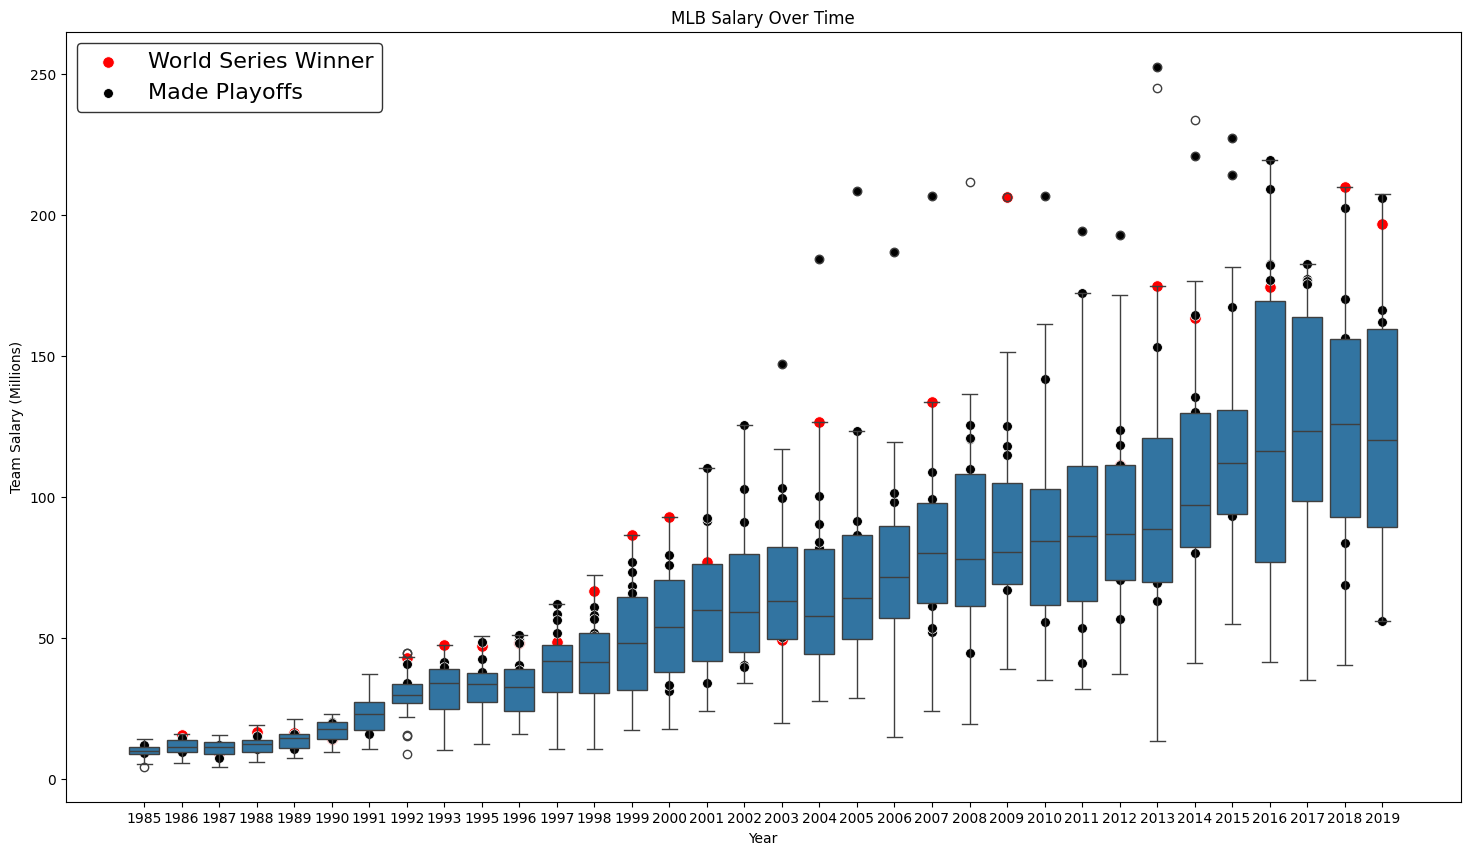

In [18]:
fig, ax = plt.subplots()
sns.boxplot(x = teams['yearID'],y = teams['salary_x']/1000000, ax=ax)
sns.scatterplot(x = teams['yearID'].unique().astype(str),y = teams[teams['WSWin'] == 'Y']['salary_x']/1000000, s = 70,color='red',ax=ax, label='World Series Winner')

years_playoffs = []
for a in teams[(teams['playoffs'] == 'Y') & (teams['WSWin'] == 'N')]['year_ID']:
    years_playoffs.append(str(a))


sns.scatterplot(x = years_playoffs ,y = teams[(teams['playoffs'] == 'Y') & (teams['WSWin'] == 'N')]['salary_x']/1000000, s = 50,color='black',ax=ax, label='Made Playoffs')
plt.title('MLB Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Team Salary (Millions)')
ax.legend(loc='upper left', frameon=True,edgecolor = 'black', fontsize=16)

### Salary Plus Distributions

Salary_Plus is a stat created for the sake of comparison between team/player salaries across multiple seasons. It is defined as:

$$\text{SalaryPlus} = \frac{\text{Team's Salary}}{\text{Average Team's Salary that Season}}$$

where "Team" refers to a specific team and season. A similar calculation is done to give each player a Salary_Plus by comparing that player's salary to the average for that season. 

Text(0.5, 1.0, 'Salary_Plus Distribution')

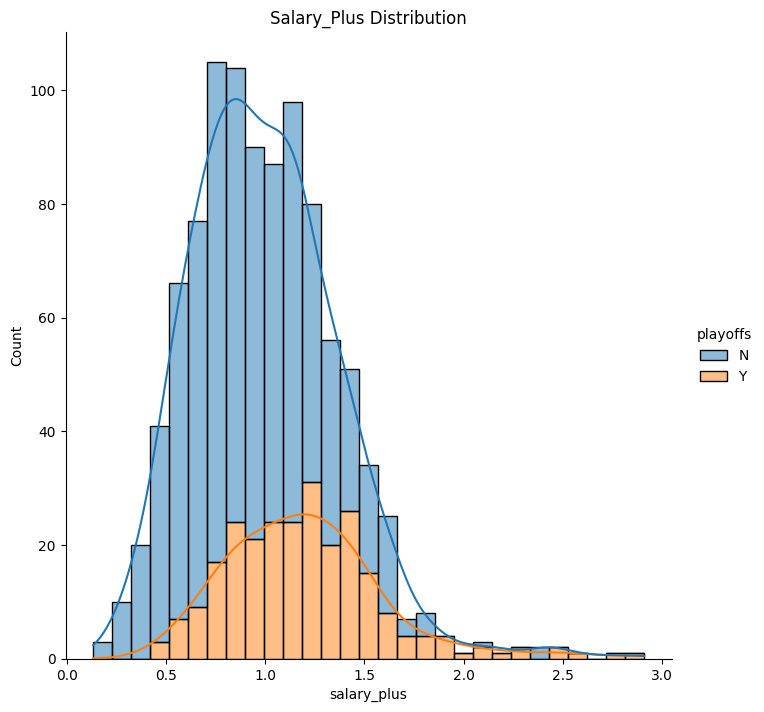

In [19]:
sns.displot(x = teams['salary_plus']
            , hue = teams['playoffs'], multiple='stack'
            #, kind='kde'
            , kde = True
            , height=7
            ,
            )

plt.title('Salary_Plus Distribution')

Text(0.5, 1.0, 'Team Salary_Plus vs Team WAR ')

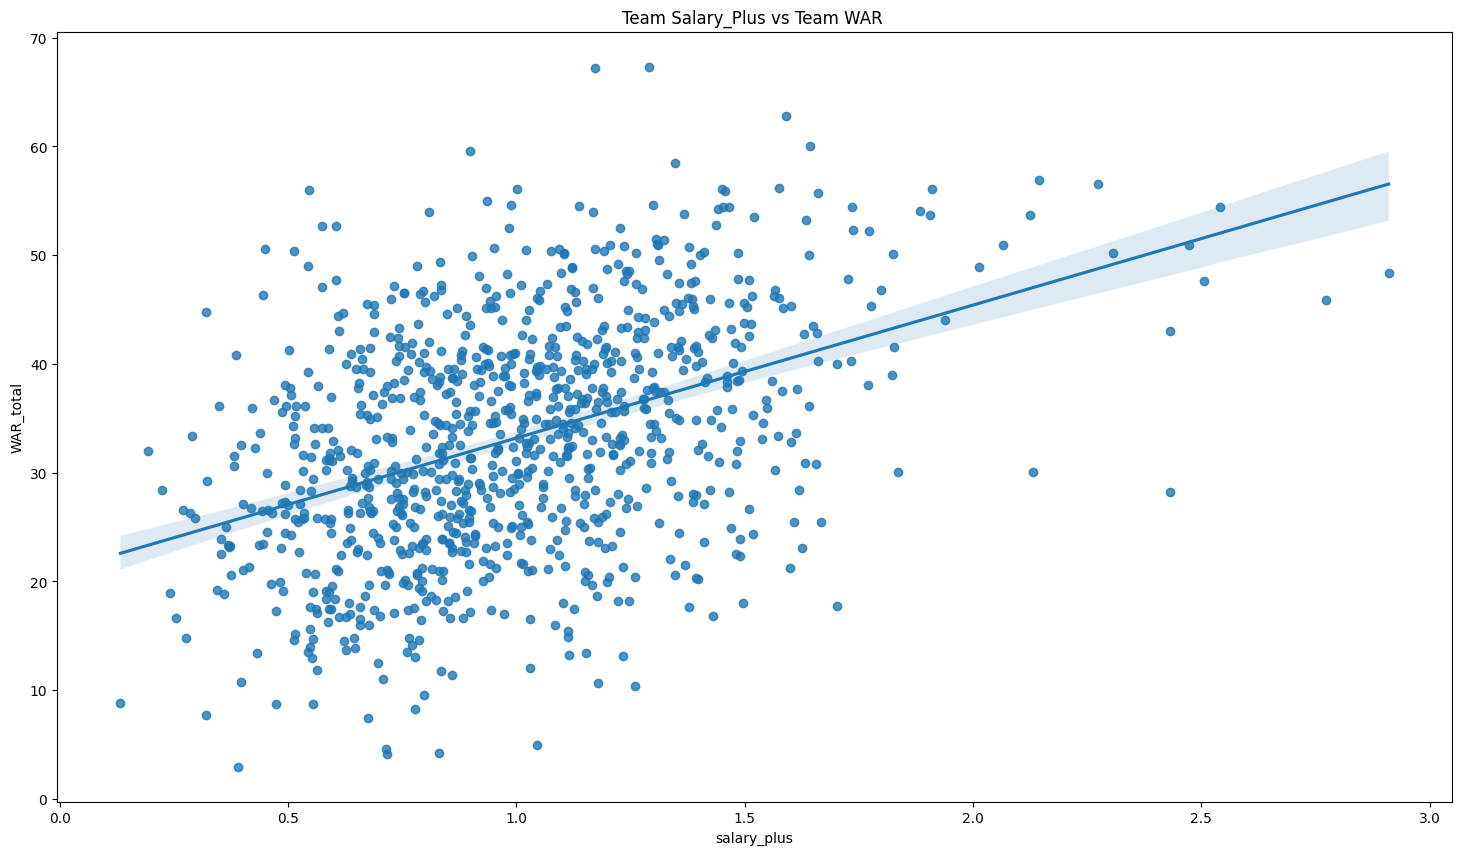

In [20]:
sns.regplot(x = teams['salary_plus'],y = teams['WAR_total']
              #, kind = 'reg'
              #, height = 9
              #, xlim=(0,2.5), ylim=(0,45)
              )
plt.title('Team Salary_Plus vs Team WAR ')

In [21]:
plus_performance = []

for increment in range(1,260,1):
    increment = increment/100
    less_Y = len(teams[(teams['aggregated_salary_plus'] < increment) & (teams['playoffs'] == 'Y')])    
    less_N = len(teams[(teams['aggregated_salary_plus'] < increment) & (teams['playoffs'] == 'N')])
    more_Y = len(teams[(teams['aggregated_salary_plus'] > increment) & (teams['playoffs'] == 'Y')])
    more_N = len(teams[(teams['aggregated_salary_plus'] > increment) & (teams['playoffs'] == 'N')])

    if less_N>0 or less_Y>0:
        less = less_Y/(less_Y + less_N)   
    else:
        less = 0
    if more_Y>0 or more_N>0:
        more = more_Y/(more_Y + more_N)
    else:
        less = 0

    plus_performance.append([increment,less,more])

plus_performance = np.array(plus_performance)

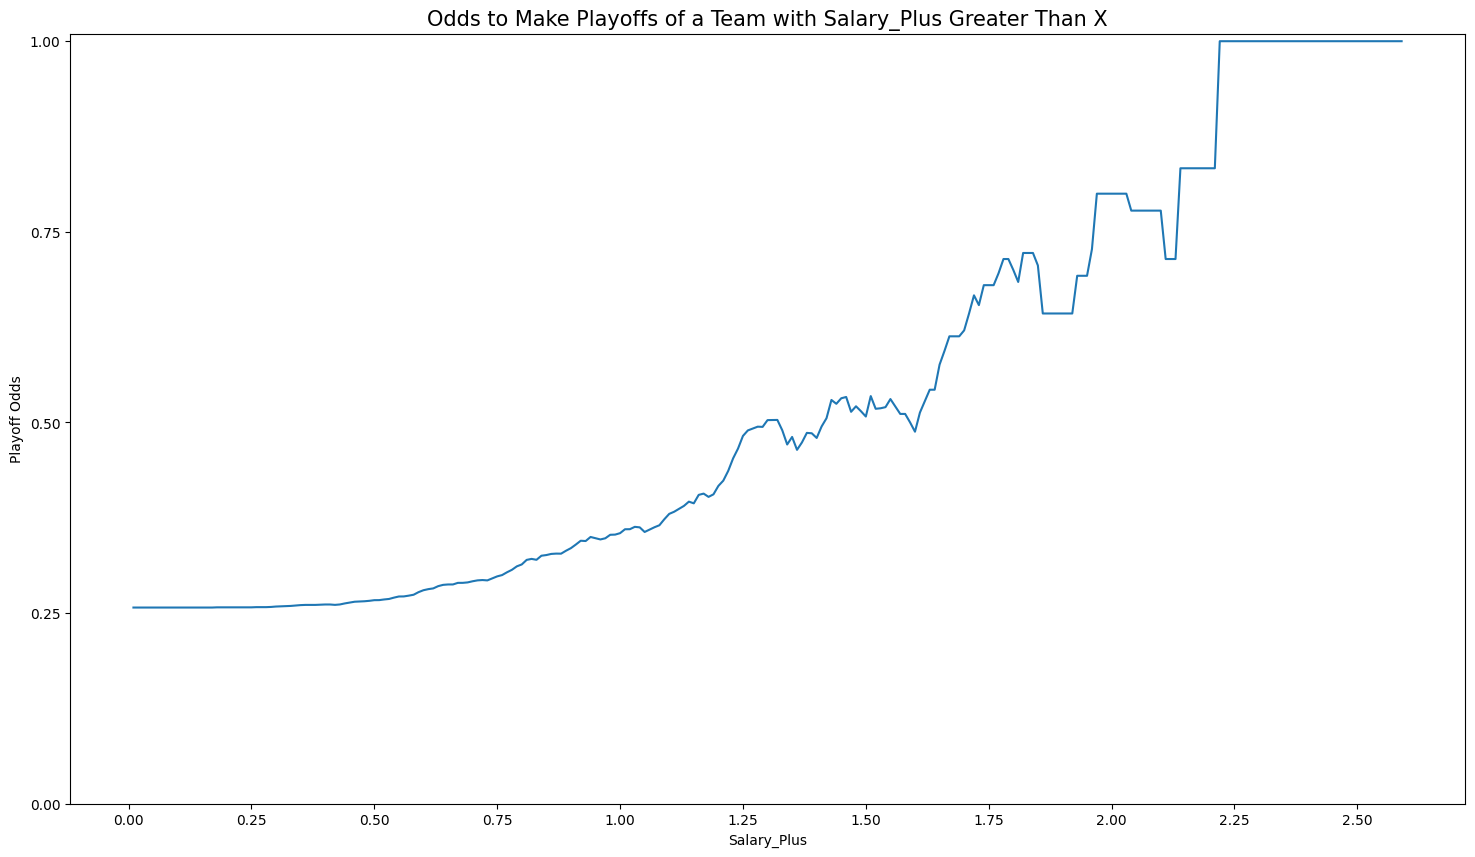

In [22]:
#plt.plot(plus_performance[:,0],plus_performance[:,1])
sns.lineplot(x=plus_performance[:,0],y=plus_performance[:,2])
#plt.yscale('log')
plt.ylim(0,1.01)
plt.xlabel('Salary_Plus')
plt.ylabel('Playoff Odds')
plt.title('Odds to Make Playoffs of a Team with Salary_Plus Greater Than X', fontsize=15)
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks(np.linspace(0,2.5,11));


In [23]:
len(teams[teams['salary_plus'] > 1.65])

38

In [24]:
plus_performance_hist = []
for increment in range(1,260,1):
    increment = increment/100

    yes_playoffs = len(teams[(teams['salary_plus'] > increment - 0.1) & (teams['salary_plus'] < increment + 0.1) & (teams['playoffs'] == 'Y')])    
    no_playoffs = len(teams[(teams['salary_plus'] > increment - 0.1) & (teams['salary_plus'] < increment+ 0.1)  & (teams['playoffs'] == 'N')])

    if no_playoffs>0 or yes_playoffs>0:
        playoff_percentage = yes_playoffs/(yes_playoffs+no_playoffs) 
    else:
        playoff_percentage = 0
    

    plus_performance_hist.append([increment,playoff_percentage])
plus_performance_hist = np.array(plus_performance_hist)

Text(0.5, 1.0, 'Salary vs Playoff Odds Histogram')

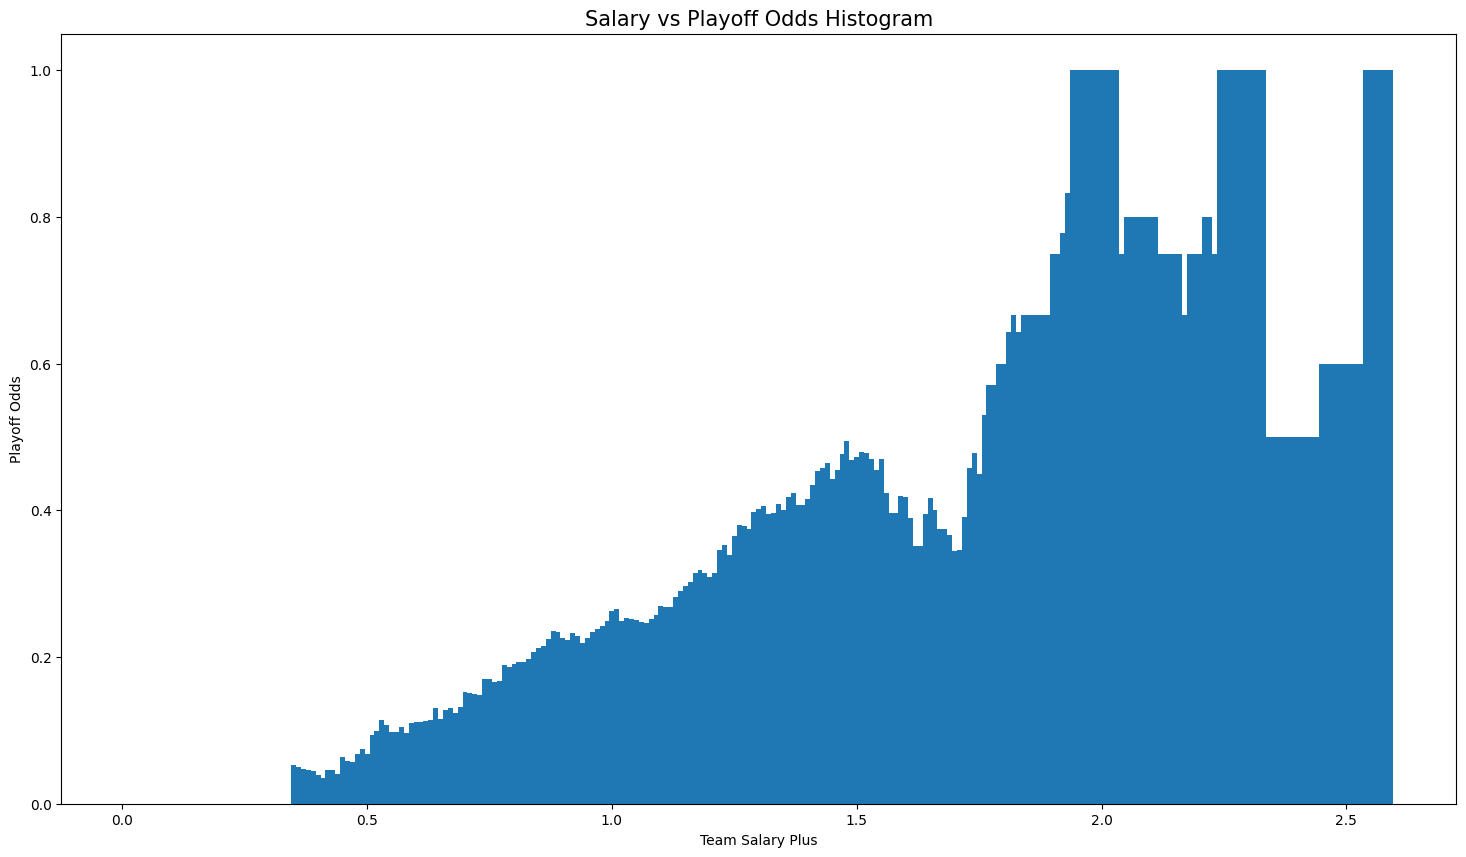

In [25]:
plt.bar(plus_performance_hist[:,0],plus_performance_hist[:,1], width = .01)
plt.xlabel('Team Salary Plus')
plt.ylabel('Playoff Odds')
plt.title('Salary vs Playoff Odds Histogram', fontsize=15)

### WAR Distributions

Using [WAR](https://www.baseball-reference.com/about/war_explained.shtml)  as a proxy for total team production, and using this to view how well teams produce based on their salary. 

In the 2nd plot here, WAR_Salary_Plus is defined as WAR/Salary_Plus, and is a proxy for the value a team gets for their money spent. It is compared again vs Total WAR production to see the distribution of team's successes and how efficient their spending is to achieve this. 

Text(0.5, 1.02, 'Salary_Plus vs Team WAR Production')

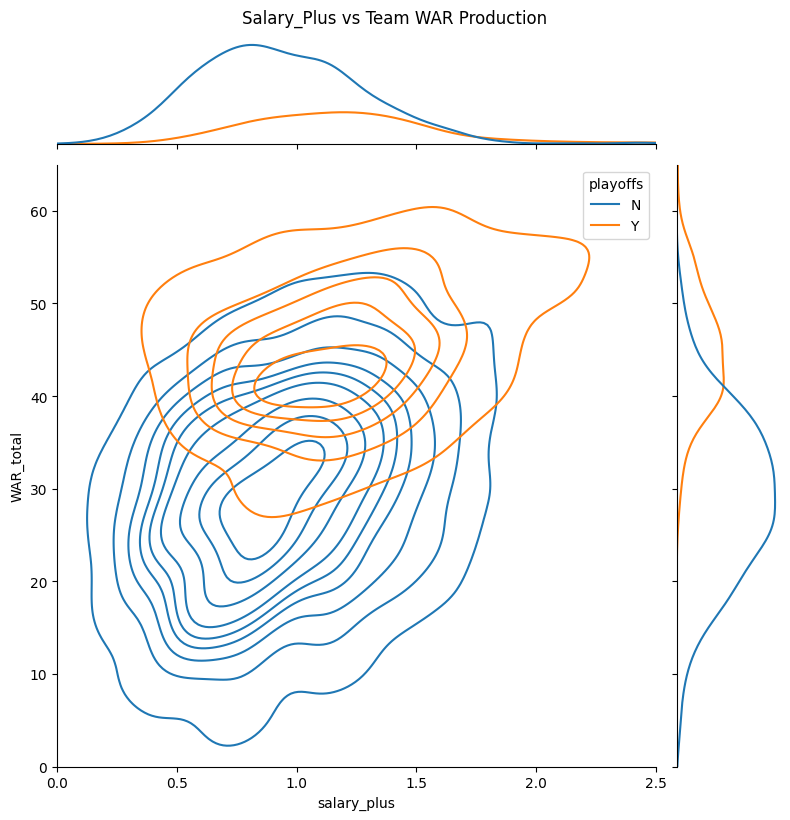

In [26]:
sns.jointplot(x = teams['salary_plus'],y = teams['WAR_total'], hue = teams['playoffs']
              , kind = 'kde'
              , height = 8
              , xlim=(0,2.5), ylim=(0,65)
              )

plt.suptitle('Salary_Plus vs Team WAR Production', y= 1.02)

Text(0.5, 1.0, 'WAR Per Salary_Plus vs Team WAR Production')

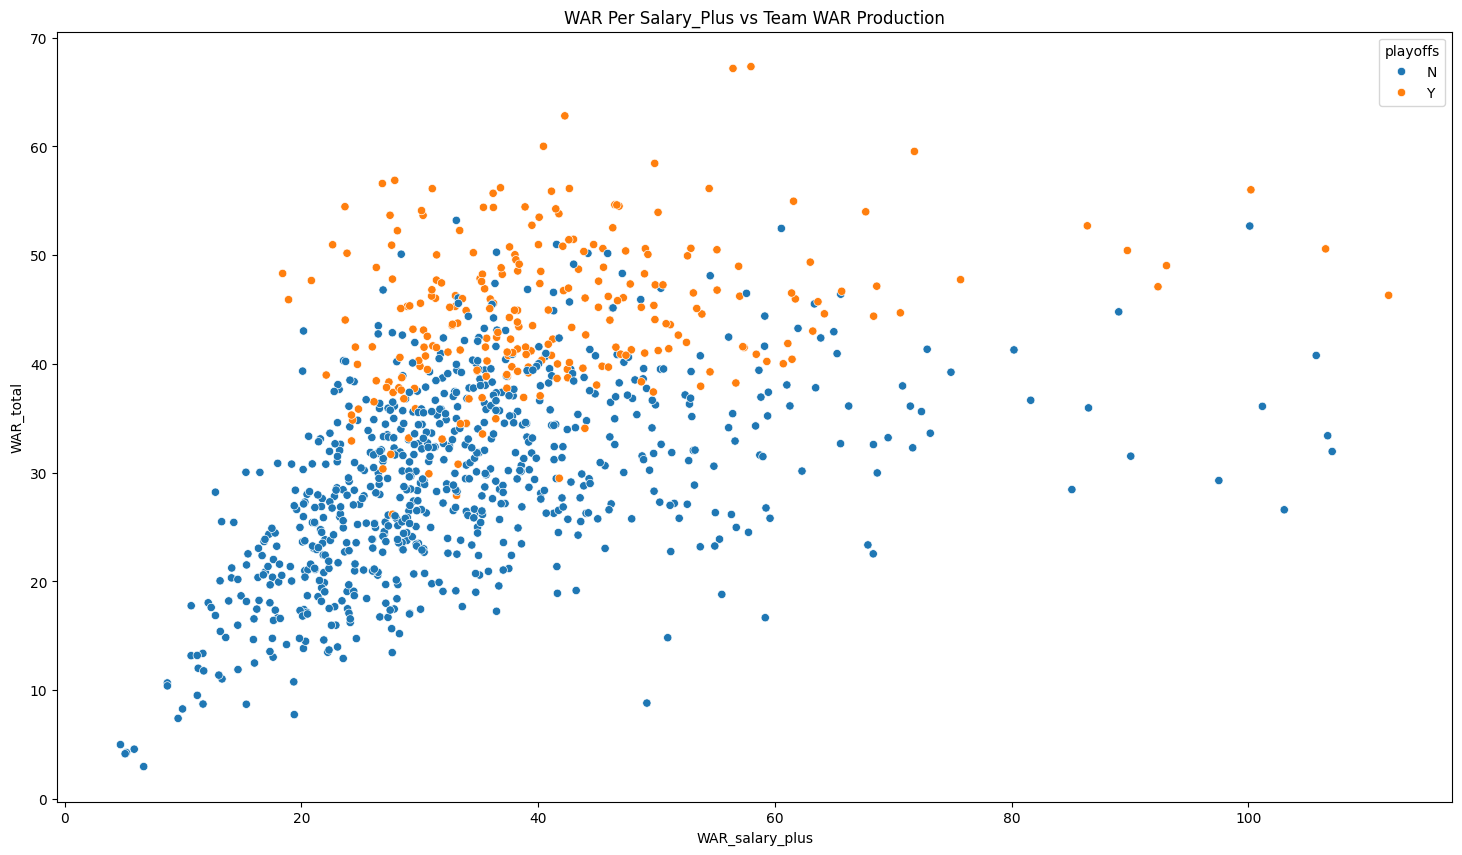

In [27]:
sns.scatterplot(x = teams['WAR_salary_plus'],y = teams['WAR_total'], hue = teams['playoffs'])
plt.title('WAR Per Salary_Plus vs Team WAR Production')